90 : 속초, 212 : 홍천, 93 : 북춘천, 216 : 태백, 95 : 철원, 217 : 정선군, 98 : 동두천, 221 : 제천, 99 : 파주, 226 : 보은, 100 : 대관령, 232 : 천안, 101 : 춘천, 235 : 보령, 102 : 백령도, 236 : 부여, 104 : 북강릉, 238 : 금산, 105 : 강릉, 239 : 세종, 106 : 동해, 243 : 부안, 108 : 서울, 0 : 끝


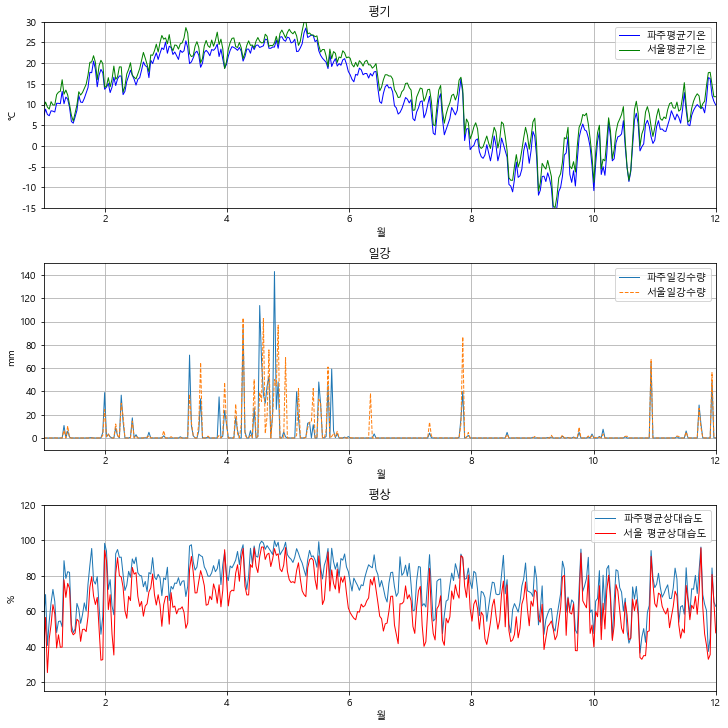

In [ ]:
import requests
from datetime import date, timedelta
import xmltodict, json
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)

plt.rc('font', family='Malgun Gothic')
plt.text(0.3, 0.3, '한글', size=100)
%matplotlib inline
print("90 : 속초, 212 : 홍천, 93 : 북춘천, 216 : 태백, 95 : 철원, 217 : 정선군, 98 : 동두천, 221 : 제천, 99 : 파주, 226 : 보은, 100 : 대관령, 232 : 천안, 101 : 춘천, 235 : 보령, 102 : 백령도, 236 : 부여, 104 : 북강릉, 238 : 금산, 105 : 강릉, 239 : 세종, 106 : 동해, 243 : 부안, 108 : 서울, 0 : 끝")




def sch(a):
    yesterday = date.today() - timedelta(1)
    yearago = yesterday - timedelta(365)
    key = ""
    url = "".format(key,yearago.strftime('%Y%m%d'),yesterday.strftime('%Y%m%d'),a)

    content = requests.get(url).content
        #print(content)



    dict = xmltodict.parse(content)
    jsonstring = json.dumps(dict['response']['body']['items']['item'],ensure_ascii=False)
    jsonobj =  json.loads(jsonstring)

    ta = []
    rn = []
    rhm = []
    for item in jsonobj:
        if item['sumRn'] == None:
            item['sumRn'] = 0.0


        ta.append(float(item['avgTa']))
        rn.append(float(item['sumRn']))
        rhm.append(float(item['avgRhm']))




    #np1 = np.array(ta)
    #np2 = np.array(rn)
    #np3 = np.array(rhm)
    bb = []
    bb.append(ta)
    bb.append(rn)
    bb.append(rhm)
    return bb


###########################################################################################

sch(108)
sch(108)

x =np.linspace(1, 12, 365)

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

fig, ax = plt.subplots(3,1,constrained_layout=True)

ax[0].plot(x,sch(99)[0],"b-",linewidth=1, label = "파주평균기온")
ax[0].plot(x,sch(108)[0],"g-",linewidth=1, label = "서울평균기온")
ax[0].set(xlim=[1,12], ylim=[-15,30])
ax[0].set_title("평기")
ax[0].set_xlabel("월")
ax[0].set_ylabel("°C")
ax[0].legend();

ax[1].plot(x,sch(99)[1],"-",linewidth=1, label = "파주일깅수량")
ax[1].plot(x,sch(108)[1],"--",linewidth=1, label = "서울일강수량")
ax[1].set(xlim=[1,12], ylim=[-10,150])
ax[1].set_title("일강")
ax[1].set_xlabel("월")
ax[1].set_ylabel("mm")
ax[1].legend();

ax[2].plot(x,sch(99)[2],"-",linewidth=1, label = "파주평균상대습도")
ax[2].plot(x,sch(108)[2],"r-",linewidth=1, label = "서울 평균상대습도")
ax[2].set(xlim=[1,12],ylim=[15,120])
ax[2].set_title("평상")
ax[2].set_xlabel("월")
ax[2].set_ylabel("%")
ax[2].legend();
